## detect the upper half face

Let's grab some frames, detect your head, then crop the left side in order to save it as a database for further learning.


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.set_printoptions(precision=2, suppress=True)
# define plots to be inserted interactively
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

Let's grab some frames. During that time, I recommend to:
- not move the head (I hold them in my hands) and to look at the led of your webcam,
- when it's lit, move your eyes evenly on the screen (try to avoid moving eyebrows or to do sacaddes).

In [2]:
from LeCheapEyeTracker.EyeTrackerServer import Server
from LeCheapEyeTracker.EyeTrackerClient import Client

et = Server()
t0 = et.clock()
#et.run(T=10)
#server.close()

et.close()
print (et.clock()-t0)

/Users/laurentperrinet/research/Shared/2018-03-19_StageL3/LeCheapEyeTracker/src/LeCheapEyeTracker/haarcascade_frontalface_default.xml
Capture released
0.4151970340171829


In [3]:
N_frame = 4
import time
time.sleep(1.)
et = Server()
print ('Time', et.clock())
img0 = et.cam.grab()

H, W, three = img0.shape
movie = np.zeros((H, W, 3, N_frame), dtype=np.uint8)

for i in range(N_frame):                
    print('frame', i)
    movie[:, :, :, i] = et.cam.grab()
    time.sleep(0.3)
    
img = et.cam.grab()
et.close()

Time 998523.261593137
frame 0
frame 1
frame 2
frame 3
Capture released


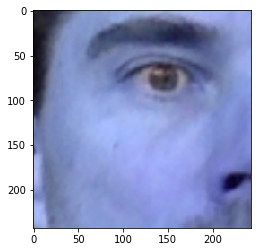

In [4]:
img_face, res, t0 = et.process_frame(movie[:, :, :, -1], et.clock())

plt.imshow(img_face)

In [5]:
def get_stack(N_frame = 64, startup_time=1., interframe_time=.3):
    import time
    time.sleep(startup_time)
    et = Server()
    print ('Time', et.clock())
    img0 = et.cam.grab()
    img_face, res, t0 = et.process_frame(img0, et.clock())

    H, W, three = img_face.shape
    movie = np.zeros((H, W, 3, N_frame), dtype=np.uint8)
    for i in range(N_frame):                
        print('frame', i, '/', N_frame)
        frame = et.cam.grab()
        img_face, res, t0 = et.process_frame(frame, et.clock())
        movie[:, :, :, i] = img_face
        time.sleep(interframe_time)
    
    et.close()
    return movie
movie = get_stack()

Time 998527.482089206
frame 0 / 64
frame 1 / 64
frame 2 / 64
frame 3 / 64
frame 4 / 64
frame 5 / 64
frame 6 / 64
frame 7 / 64
frame 8 / 64
frame 9 / 64
frame 10 / 64
frame 11 / 64
frame 12 / 64
frame 13 / 64
frame 14 / 64
frame 15 / 64
frame 16 / 64
frame 17 / 64
frame 18 / 64
frame 19 / 64
frame 20 / 64
frame 21 / 64
frame 22 / 64
frame 23 / 64
frame 24 / 64
frame 25 / 64
frame 26 / 64
frame 27 / 64
frame 28 / 64
frame 29 / 64
frame 30 / 64
frame 31 / 64
frame 32 / 64
frame 33 / 64
frame 34 / 64
frame 35 / 64
frame 36 / 64
frame 37 / 64
frame 38 / 64
frame 39 / 64
frame 40 / 64
frame 41 / 64
frame 42 / 64
frame 43 / 64
frame 44 / 64
frame 45 / 64
frame 46 / 64
frame 47 / 64
frame 48 / 64
frame 49 / 64
frame 50 / 64
frame 51 / 64
frame 52 / 64
frame 53 / 64
frame 54 / 64
frame 55 / 64
frame 56 / 64
frame 57 / 64
frame 58 / 64
frame 59 / 64
frame 60 / 64
frame 61 / 64
frame 62 / 64
frame 63 / 64
Capture released


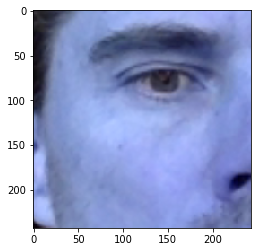

In [6]:
plt.imshow(movie[:, :, :, -1])

In [7]:
movie.shape

(243, 243, 3, 64)